In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#Lets import the CSV file
csv = pd.read_csv('suicide-death-rates.csv')
csv.head()


,Entity,Code,Year,Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,10.32
1,Afghanistan,AFG,1991,10.33
2,Afghanistan,AFG,1992,10.27
3,Afghanistan,AFG,1993,10.38
4,Afghanistan,AFG,1994,10.58


In [4]:
#Lets import the json file
json = pd.read_json('gdp.json')
json.head()

,Entity,Code,Year,"GDP per capita, PPP (constant 2011 international $)"
0,Afghanistan,AFG,2002,1063.635574
1,Afghanistan,AFG,2003,1099.194507
2,Afghanistan,AFG,2004,1062.249360
3,Afghanistan,AFG,2005,1136.123214
4,Afghanistan,AFG,2006,1161.124889


Enter the country name: India


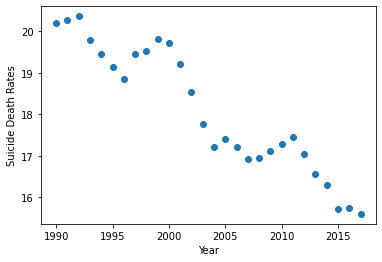

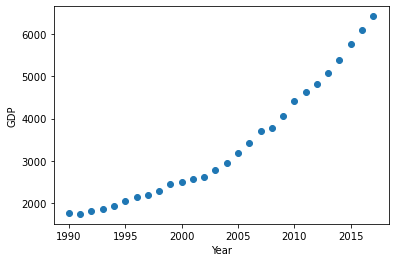

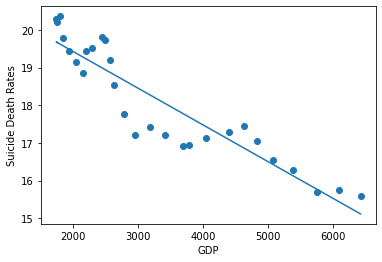

In [129]:
#You can enter the country name to see their relation
country = input("Enter the country name: ")

#lets see the trend of the suicide rate against the year
y = csv.loc[csv['Entity']==country]
scd_year = y['Year']
scd = y['Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)']
plt.scatter(scd_year,scd)
plt.xlabel('Year')
plt.ylabel('Suicide Death Rates')
plt.show()

#lets see their trend against GDP and Year
x = json.loc[json['Entity']==country]
gdp_year = x['Year']
gdp = x['GDP per capita, PPP (constant 2011 international $)']
plt.scatter(gdp_year,gdp)
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

#Display the relation between GDP and the SuicideRate of the given country
plt.scatter(gdp,scd)
plt.xlabel('GDP')
plt.ylabel('Suicide Death Rates')
#Create a best fit line in the scatter plot
m, b = np.polyfit(gdp, scd, 1)
plt.plot(gdp, m*gdp + b)
plt.show()

In [8]:
#Lets select the World Data from the csv and json dataset

world_csv = csv.loc[csv['Entity']=='World']

world_json = json.loc[json['Entity']=="World"]


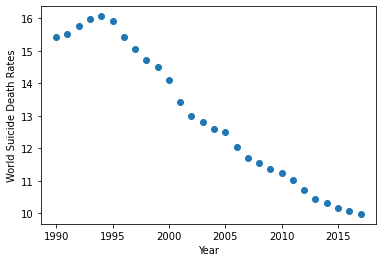

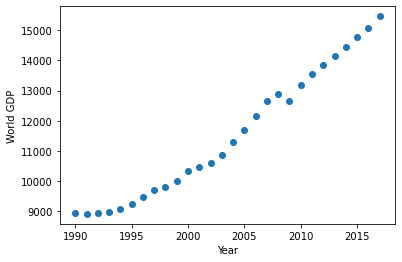

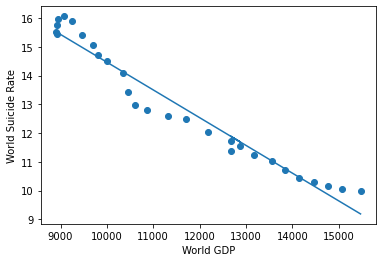

In [131]:
#Lets cisualize the trends in the world
world_suicide = world_csv['Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)']

world_gdp = world_json['GDP per capita, PPP (constant 2011 international $)']

#lets visualize the relation between the world_suicide_rate and year
plt.scatter(world_csv['Year'],world_suicide)
plt.xlabel('Year')
plt.ylabel('World Suicide Death Rates')
plt.show()

#Lets visualize the relation between the world_gdp and the year
plt.scatter(world_json['Year'],world_gdp)
plt.xlabel('Year')
plt.ylabel('World GDP')
plt.show()

#Visualize the relationship between the world_suicide_rate and the world_gdp
plt.scatter(world_gdp,world_suicide)
plt.xlabel('World GDP')
plt.ylabel('World Suicide Rate')
#Create a best fit line in the scatter plot
m, b = np.polyfit(world_gdp, world_suicide, 1)
plt.plot(world_gdp, m*world_gdp + b)
plt.show()

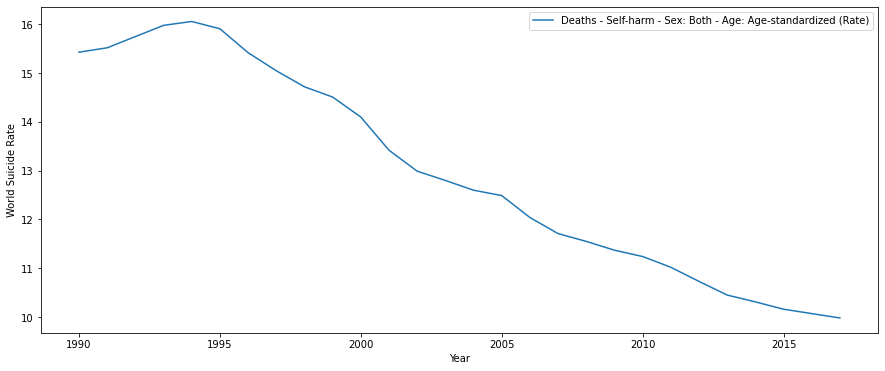

In [13]:
# Time Series for World suicide rate
from datetime import datetime

df = pd.DataFrame(world_csv, columns = ['Year', 'Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)'])

# Set the Date as Index
df.index = df['Year']
del df['Year']

df.plot(figsize=(15, 6))
plt.ylabel('World Suicide Rate')
plt.show()

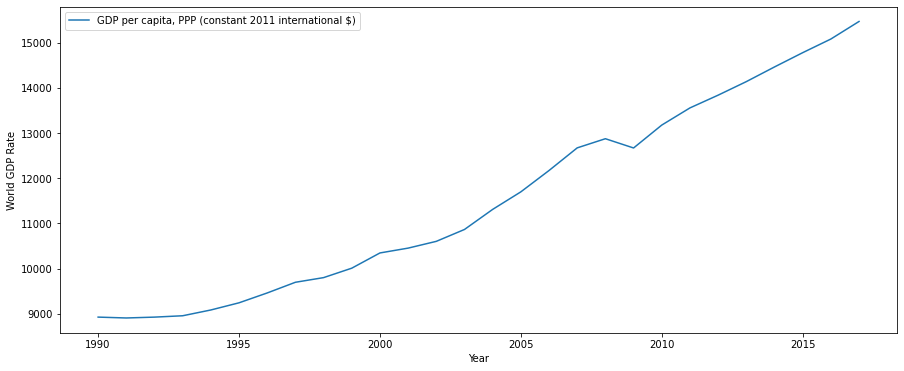

In [14]:
#time series for world gdp
df = pd.DataFrame(world_json, columns = ['Year', 'GDP per capita, PPP (constant 2011 international $)'])

# Set the Date as Index
df.index = df['Year']
del df['Year']
df.plot(figsize=(15, 6))
plt.ylabel('World GDP Rate')
plt.show()